# CPSC322 Final Project
## The Statistical Analysis of Correlation Between United States Airline Stocks and Covid-19 Data

In [144]:
import importlib
from matplotlib import pyplot as plt
import os
importlib.reload(os)

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myutils as myutils
importlib.reload(myutils)

import mysklearn.plot_utils as plt_utils
importlib.reload(plt_utils)

data_name = os.path.join("input_data", "322-Project-Table.csv")
projectData = MyPyTable().load_from_file(data_name)

## Data Preparation
Since our data set is large, we can not perform EDA on the entirety of the dataset, we extracted some attributes and performed EDA on attributes that seemingly would go together or correlate to each other.

We had to use many function just to get the data be in a presentable mannor for EDA and one of the functions that was really useful is the `combineColumn()` function, where it take two column and make it into a table.

In [145]:
def combineColumn(col1, col2):
    table = []
    for i in range(len(col1)):
        row = [col1[i], col2[i]]
        table.append(row)
    return table

## EDA Of Total Change, Before, During Covid-19
### JetBlue Airline Total

In [146]:
covidStatus = projectData.get_column("before-or-during-Covid")

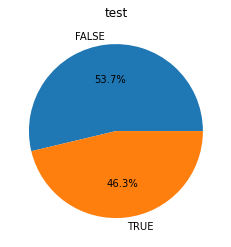

In [147]:
jbluincrease = projectData.get_column("JBLU-Went-Up?")

x_list = set(jbluincrease)
jbluCount = [jbluincrease.count(label) for label in x_list]
plt_utils.pie_graph(x_list, jbluCount, "test")

From the pie graph, it is apparent that JetBlue Airline in total from the date `9/4/2018` to `12/9/2022` was at a net-negative, the number of days where the stock price of the company at the end of the market day was decreasing when compared to the start of the day.

### JetBlue Airline Before/During Covid-19

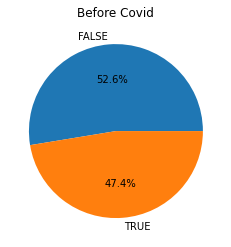

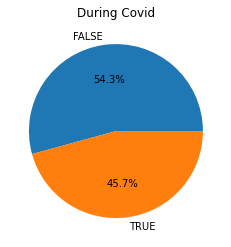

In [148]:
jbluCovid = combineColumn(jbluincrease, covidStatus)
group_names, group_subtables = myutils.group_by(jbluCovid, 1)
before = myutils.get_column(group_subtables[0], 0)

x_list = set(before)
beforeCount = [before.count(label) for label in x_list]
plt_utils.pie_graph(x_list, beforeCount, f"{group_names[0]} Covid".title())

during = myutils.get_column(group_subtables[1], 0)

x_list = set(during)
duringCount = [during.count(label) for label in x_list]
plt_utils.pie_graph(x_list, duringCount, f"{group_names[1]} Covid".title())

From the pie graph, the percentage of days where the market stock price increase was lower than the number of days where the market price that actually decreased. There is a `5.2%` of difference.

During Covid, pie graph reflects similar findings as before covid pie graph, there is a `8.6%` of difference. 

The margin is about `3.4%` difference, eventhough the margine is small, but when taking into account of the number of days(1558), it is about 52 days where the market is actually decreasing stock price. 

### United Airline Total

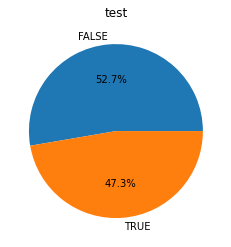

In [149]:
ualincrease = projectData.get_column("UAL-Went-Up?")

x_list = set(ualincrease)
jbluCount = [ualincrease.count(label) for label in x_list]
plt_utils.pie_graph(x_list, jbluCount, "test")

From the pie graph, it is apparent that United Airline in total from the date `9/4/2018` to `12/9/2022` was at a net-negative, the number of days where the stock price of the company at the end of the market day was decreasing when compared to the start of the day.

### United Airline Before/During Covid-19

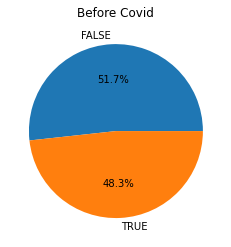

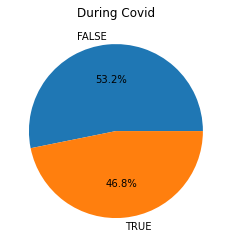

In [150]:
ualCovid = combineColumn(ualincrease, covidStatus)
group_names, group_subtables = myutils.group_by(ualCovid, 1)

before = myutils.get_column(group_subtables[0], 0)
x_list = set(before)
beforeCount = [before.count(label) for label in x_list]
plt_utils.pie_graph(x_list, beforeCount, f"{group_names[0]} Covid".title())

during = myutils.get_column(group_subtables[1], 0)
x_list = set(during)
duringCount = [during.count(label) for label in x_list]
plt_utils.pie_graph(x_list, duringCount, f"{group_names[1]} Covid".title())

From the pie graph, the percentage of days where the market stock price increase was lower than the number of days where the market price that actually decreased. There is a `3.4%` of difference.

During Covid, pie graph reflects similar findings as before covid pie graph, there is a `6.4%` of difference. 

The margin is about `3.0%` difference, the number of days(1558), it is about 47 days where the market is actually decreasing stock price. 

### American Airline Total

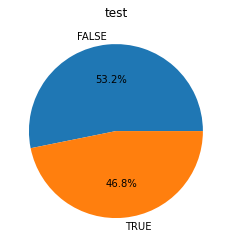

In [151]:
aalincrease = projectData.get_column("AAL-Went-Up?")

x_list = set(aalincrease)
jbluCount = [aalincrease.count(label) for label in x_list]
plt_utils.pie_graph(x_list, jbluCount, "test")

From the pie graph, it is apparent that United Airline in total from the date `9/4/2018` to `12/9/2022` was at a net-negative, the number of days where the stock price of the company at the end of the market day was decreasing when compared to the start of the day. There is about a `6.4%` of difference in total.

### American Airline Before/During Covid-19

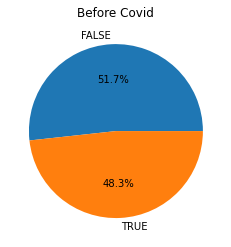

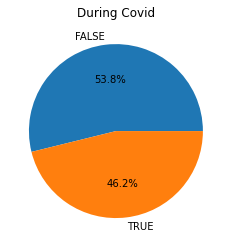

In [152]:
aalCovid = combineColumn(aalincrease, covidStatus)
group_names, group_subtables = myutils.group_by(aalCovid, 1)

before = myutils.get_column(group_subtables[0], 0)
x_list = set(before)
beforeCount = [before.count(label) for label in x_list]
plt_utils.pie_graph(x_list, beforeCount, f"{group_names[0]} Covid".title())

during = myutils.get_column(group_subtables[1], 0)
x_list = set(during)
duringCount = [during.count(label) for label in x_list]
plt_utils.pie_graph(x_list, duringCount, f"{group_names[1]} Covid".title())

From the pie graph, the percentage of days where the market stock price increase was lower than the number of days where the market price that actually decreased. There is a `3.4%` of difference.

During Covid, pie graph reflects similar findings as before covid pie graph, there is a `7.6%` of difference. 

The margin is about `4.2%` difference, the number of days(1558), it is about 66 days where the market is actually decreasing stock price. 

### Summary of Airline Stocks Before/During Covid-19
In summary, American Airlines had 66 days of decrease more than increase, United Airline had 47 days of decrease more than increase, JetBlue Airline had 52 days of decrease more than increase.

Innitially we had expected United Airline would out perform American Airline and American Airline would out perform JetBlue Airline, but after the EDA, we found that indeed, United Airlines out performed American Airline, but JetBlue Airline also out performed American Airline. To find out more about this, we did more research.

#### Market Cap of Each Airline As of Today
|Airlines|Market Cap|
|:-:|:-:|
|United|13.46 billion|
|American|8.75 billion|
|JetBlue|2.30 billion|

After research, we find that the market cap of the company would indicate that our expectation would be correct but that is not what happended. 

We then did some research and found that the overall acceptance rating of the Covid policies on a scale of `0-5`, The American Airline was 3.4 and JetBlue Airline was 3.9. We believe that this would be the reason that JetBlue Airline out performed American Airline

credit: https://infogram.com/covid-airline-ratings-jan-2022-update-1h7j4dvnz1k394n

## Bi-Weekly Analysis of Airline Stock Price Increase

In [153]:
jbluPercent = projectData.get_column("JBLU-Day-Price-Increase-(%)")
ualPercent = projectData.get_column("UAL-Day-Price-Increase-(%)")
aalPercent = projectData.get_column("AAL-Day-Price-Increase-(%)")
xonPercent = projectData.get_column("XOM-Day-Price-Increase-(%)")
dateCol = projectData.get_column("Market-Date")

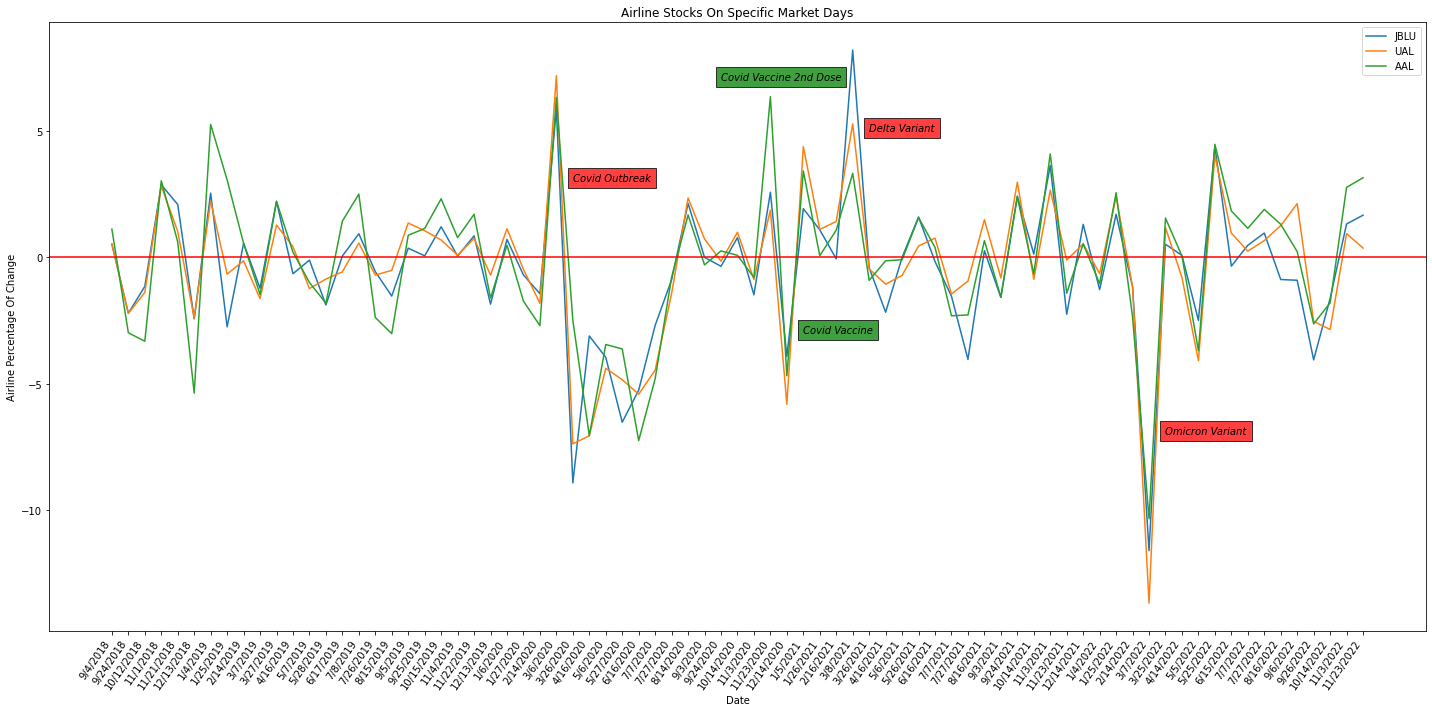

In [154]:
dayIndex = [i for i in range(len(dateCol)) if i % 14 == 0]
weekDate = [dateCol[index] for index in dayIndex]
jbluPercentWeek = [jbluPercent[index] for index in dayIndex]
ualPercentWeek = [ualPercent[index] for index in dayIndex]
aalPercentWeek = [aalPercent[index] for index in dayIndex]
xonPercentWeek = [xonPercent[index] for index in dayIndex]

Y_list = {"JBLU":jbluPercentWeek, "UAL":ualPercentWeek, "AAL":aalPercentWeek}

axis_label = ("Date", "Airline Percentage Of Change")
graph_name = "Airline Stocks On Specific Market Days"

plt_utils.multiple_line_graph(weekDate, Y_list, axis_label, graph_name)

For the entire domain of the date attribute, there are few major points in the line graph that would be significant to mention.

Specifically:
- Covid Outbreak
- Covid Vaccine
- Covid Vaccine 2nd Dose
- Delta Variant
- Omicron Variant

### EDA of Covid Case and Exxon Mobile Stock

In [155]:
worldCasePercent = projectData.get_column("total-world-cases-increase-(%)")
usCasePercent = projectData.get_column("total-usa-cases-increase-(%)")

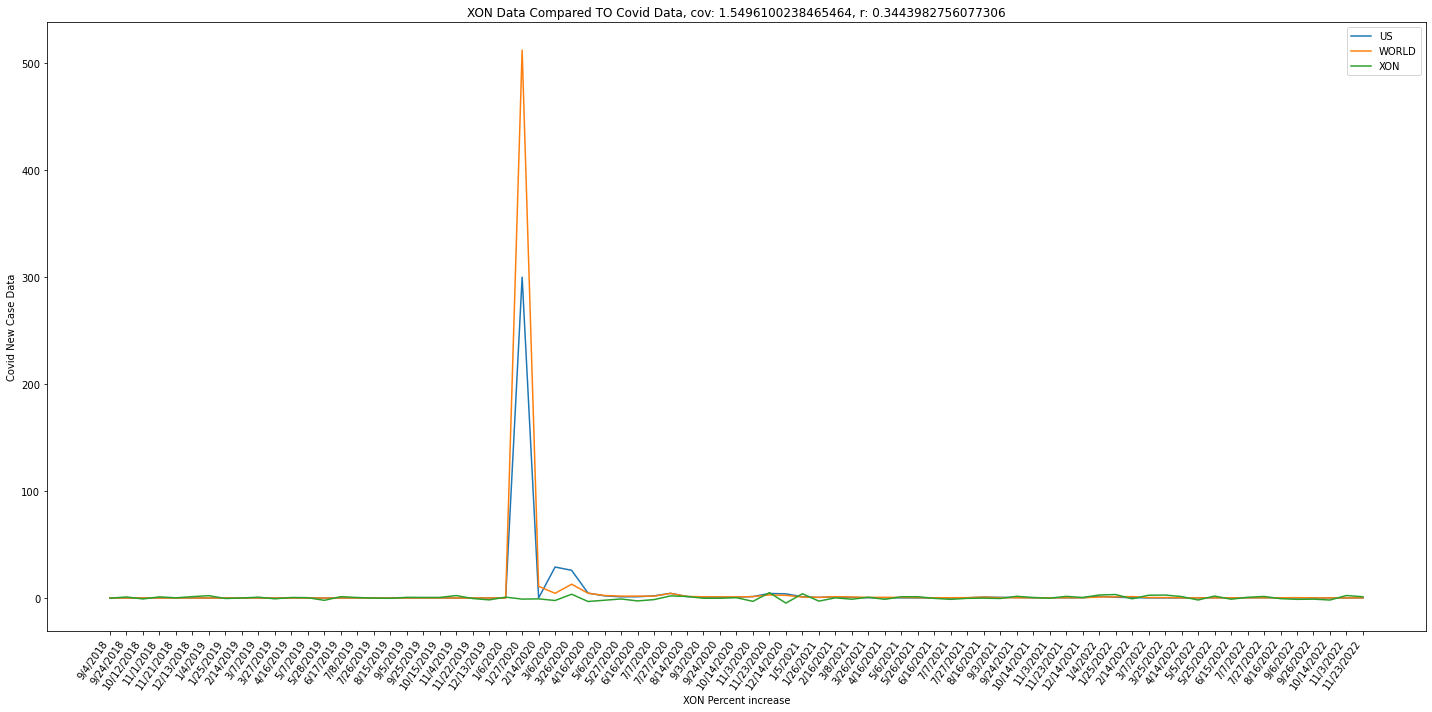

In [156]:
worldCaseWeek = [worldCasePercent[index] for index in dayIndex]
usCaseWeek = [usCasePercent[index] for index in dayIndex]

axis_label = ("XON Percent increase", "Covid New Case Data")
cov, coeff = myutils.calculate_covariance_and_coeff(xonPercent, jbluPercent)
graph_name = f"XON Data Compared TO Covid Data, cov: {cov}, r: {coeff}"
Y_list = {"US":usCaseWeek, "WORLD": worldCaseWeek, "XON":xonPercentWeek}
plt_utils.double_line_graph(weekDate, Y_list, axis_label, graph_name)

The line graph shows little to no relation between covid data and Exxon Mobile stock data, we see that when covid cases drop or rise there is no response relating the data together.

#### Correlation at Specific Three Month Intervals

In [157]:
PRECOVID_START = "10/1/2018"
PRECOVID_END = "12/3/2018"

COVID_START = "1/3/2020"
COVID_END = "3/3/2020"

POSTCOVID_START = "9/1/2022"
POSTCOVID_END = "11/1/2022"

preIndexStart = dateCol.index(PRECOVID_START)
covidIndexStart = dateCol.index(COVID_START)
postIndexStart = dateCol.index(POSTCOVID_START)

preIndexEnd = dateCol.index(PRECOVID_END)
covidIndexEnd = dateCol.index(COVID_END)
postIndexEnd = dateCol.index(POSTCOVID_END)

pre_covidIndex = [i for i in range(preIndexStart, preIndexEnd+1)]
during_covidIndex = [i for i in range(covidIndexStart, covidIndexEnd+1)]
post_covidIndex = [i for i in range(postIndexStart, postIndexEnd+1)]

xonPercent_pre = [xonPercent[index] for index in pre_covidIndex]
xonPercent_dur = [xonPercent[index] for index in during_covidIndex]
xonPercent_pos = [xonPercent[index] for index in post_covidIndex]

usCasePre = [usCasePercent[index] for index in pre_covidIndex]
usCaseDur = [usCasePercent[index] for index in during_covidIndex]
usCasePos = [usCasePercent[index] for index in post_covidIndex]

worldCasePre = [worldCasePercent[index] for index in pre_covidIndex]
worldCaseDur = [worldCasePercent[index] for index in during_covidIndex]
worldCasePos = [worldCasePercent[index] for index in post_covidIndex]

date_pre = [dateCol[index] for index in pre_covidIndex]
date_dur = [dateCol[index] for index in during_covidIndex]
date_pos = [dateCol[index] for index in post_covidIndex]

##### Pre-Covid Correlation

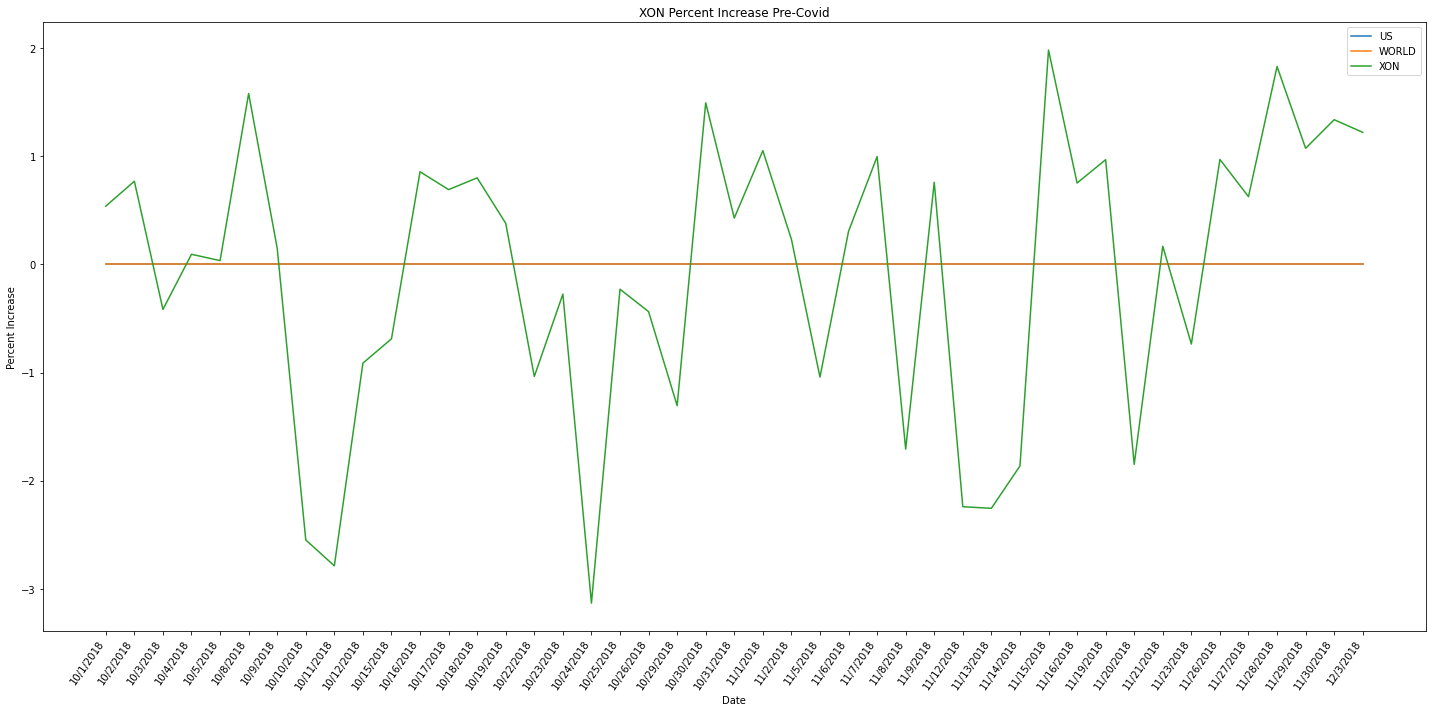

In [162]:
axis_label = ("Date", "Percent Increase")
graph_name = "XON Percent Increase Pre-Covid"

Y_list = {"US":usCasePre, "WORLD": worldCasePre, "XON":xonPercent_pre}
plt_utils.double_line_graph(date_pre, Y_list, axis_label, graph_name)

From the line plot, it is trivial that there is no correlation and covariance. Covariance: `0.0`, Correlation Coefficient: `nan`

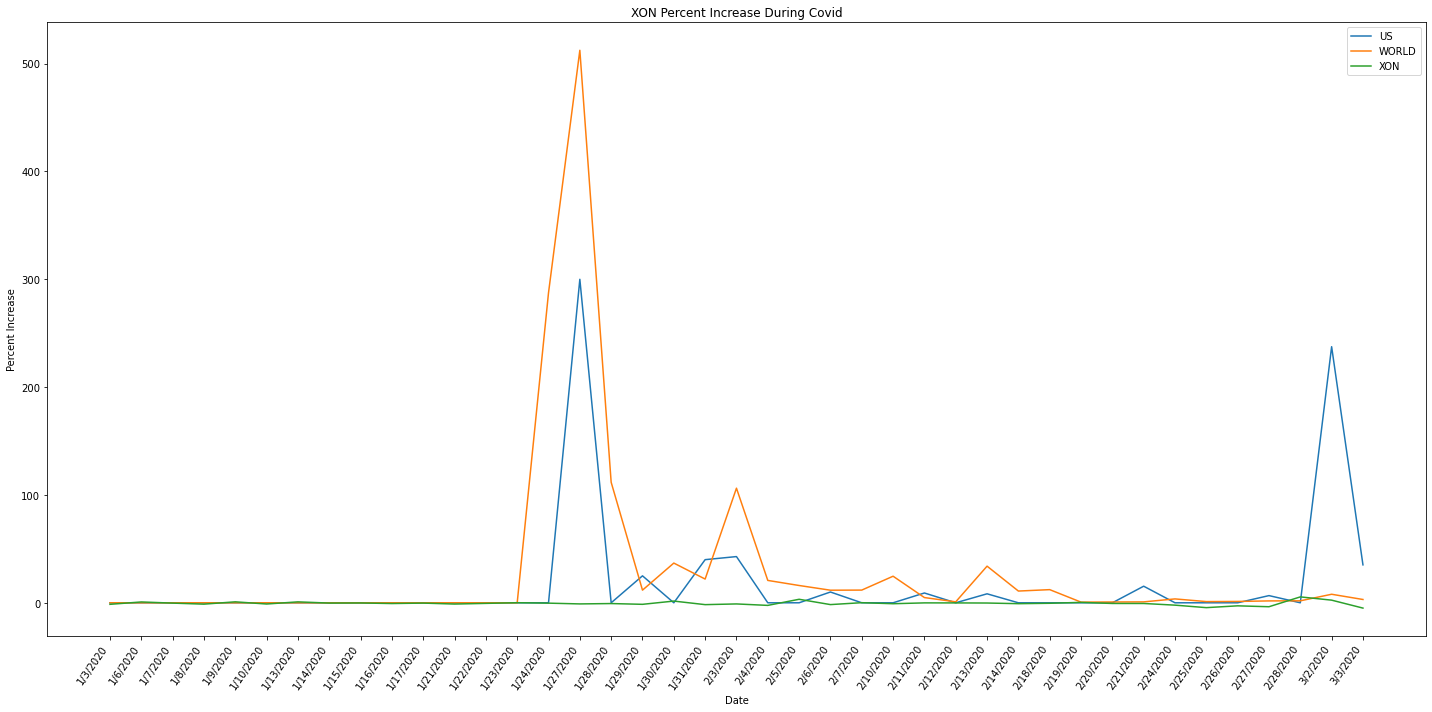

cov: 7.659574470371299, coeff: 0.07258532056987758
cov: -3.9414645863382973, coeff: -0.024065379039953063


In [165]:
axis_label = ("Date", "Percent Increase")
usCov, usCoeff = myutils.calculate_covariance_and_coeff(usCaseDur, xonPercent_dur)
worldCov, worldCoeff = myutils.calculate_covariance_and_coeff(worldCaseDur, xonPercent_dur)
graph_name = "XON Percent Increase During Covid"

Y_list = {"US":usCaseDur, "WORLD": worldCaseDur, "XON":xonPercent_dur}
plt_utils.double_line_graph(date_dur, Y_list, axis_label, graph_name)

usData = f"cov: {usCov}, coeff: {usCoeff}"
worldData = f"cov: {worldCov}, coeff: {worldCoeff}"

From the line graph,   
The US case and XON mobile have covariance of `7.659574470371299` and correlation coefficient of `0.07258532056987758`.  
The World case and XON mobile have covariance `-3.9414645863382973`, correlation coefficient of `-0.024065379039953063`

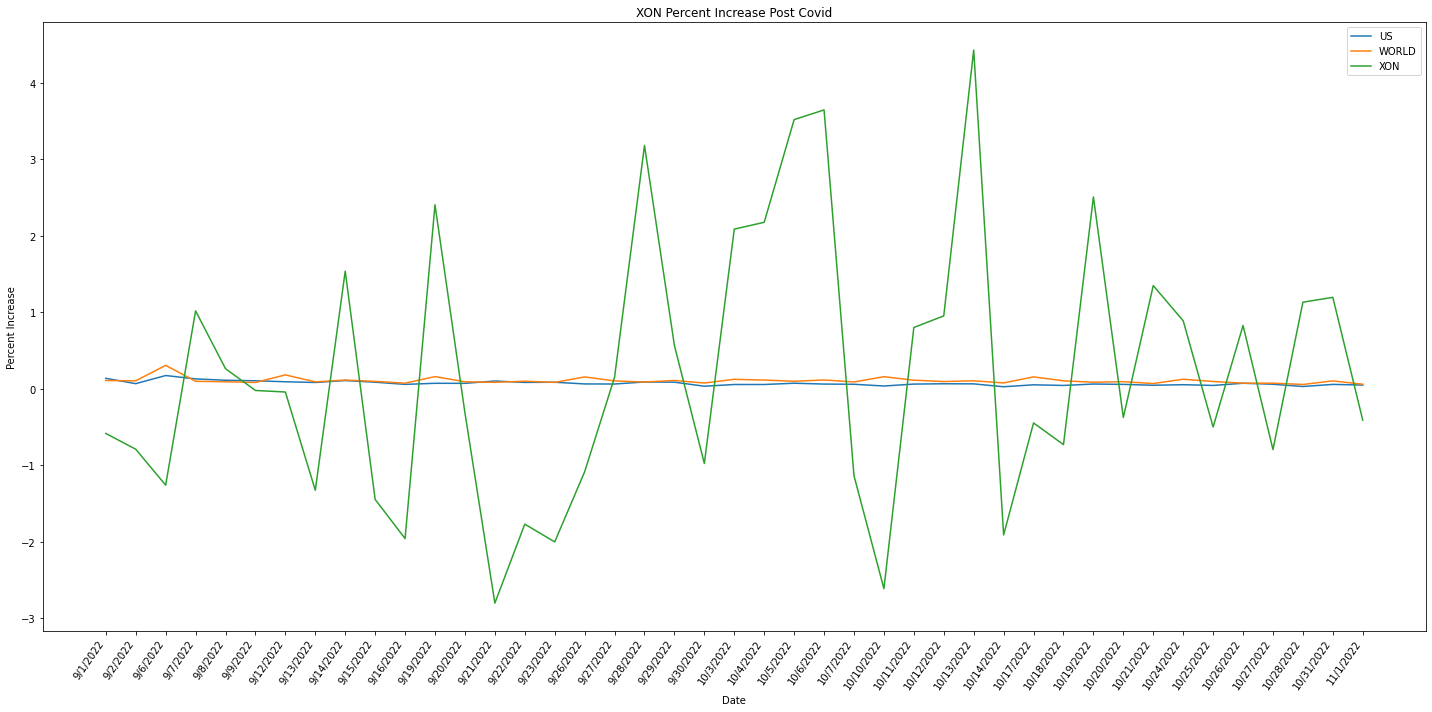

cov: -0.002212385451750628, coeff: -0.044331405184765756
cov: -0.0031656177731798113, coeff: -0.04501823544482835


In [166]:
axis_label = ("Date", "Percent Increase")
graph_name = "XON Percent Increase Post Covid"

usCov, usCoeff = myutils.calculate_covariance_and_coeff(usCasePos, xonPercent_pos)
worldCov, worldCoeff = myutils.calculate_covariance_and_coeff(worldCasePos, xonPercent_pos)

Y_list = {"US":usCasePos, "WORLD":worldCasePos, "XON":xonPercent_pos}
plt_utils.double_line_graph(date_pos, Y_list, axis_label, graph_name)

usData = f"cov: {usCov}, coeff: {usCoeff}"
worldData = f"cov: {worldCov}, coeff: {worldCoeff}"

From the line graph,   
The US case and XON mobile have covariance of `-0.002212385451750628` and correlation coefficient of `-0.044331405184765756`.  
The World case and XON mobile have covariance `-0.0031656177731798113`, correlation coefficient of `-0.04501823544482835`